## Interaction with openstreetmap data

In [2]:
# imports
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11'

### get some data about a certain area/city

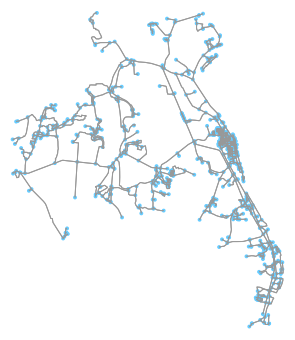

In [3]:
G = ox.graph_from_place('Danubyu, Ayeyarwady Region, Myanmar', network_type='walk')
fig, ax = ox.plot_graph(G)

In [4]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
# street network area in km2
graph_area_m/1000

461273.1776402342

### Street centrality

In [5]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

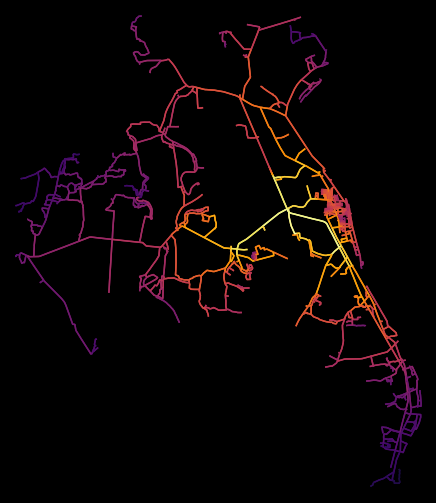

In [6]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, fig_height=9, fig_width=16, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

### Building footprint in Danubyu area

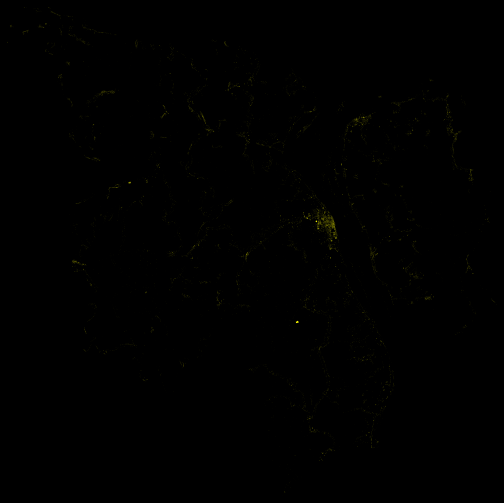

In [7]:
gdf = ox.footprints.footprints_from_place(place='Danubyu, Ayeyarwady Region, Myanmar')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='black', color='yellow', figsize=(9,9),
                           show=True, filename='piedmont_bldgs', dpi=90)


In [8]:
ox.plot_graph_folium(G, edge_color="green", edge_width=2)

### lets check what area is covered by buildings and how much percentage

In [9]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

644715153    217.285299
644715174    116.277694
644715815     33.544930
645298363    595.352486
645299800    115.271384
dtype: float64

In [10]:
# total area (sq km) covered by building footprints
total_building_area = sum(areas)
total_building_area

2894040.8097574473

In [11]:
# getting the area of danubyu(if you wonder why we didnt use the third code cell its because that one 
# is just a stret network not the district)
place = ox.gdf_from_place('Danubyu, Ayeyarwady Region, Myanmar')
place_proj = ox.project_gdf(place)
danubyu_area = place_proj.area.iloc[0]
danubyu_area

752221512.8671448

In [12]:
# percentage
total_building_area/danubyu_area

0.0038473252363211584

it seems to not be far from the 2014 census 
https://themimu.info/sites/themimu.info/files/documents/TspProfiles_Census_Danuphyu_2014_ENG.pdf

### Routing

In [13]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (17.269451, 95.583889))
dest_node = ox.get_nearest_node(G, (17.261051, 95.580755))

In [14]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
ox.plot_route_folium(G, route)

In [15]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

1257.1820000000002

In [16]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(G.nodes[orig_node]['y'], G.nodes[orig_node]['x'],
                    G.nodes[dest_node]['y'], G.nodes[dest_node]['x'])

1073.4406138700556